# <span style="color: #7e04c4;">📱 ***Mobile Price Range Classification***</span>

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Project Domain : Market Analysis___

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___Problem Statement and Goal :___

___In today's market, mobile phones come at many prices with different features. It can be hard to pick the right one for your budget and needs. To assist consumers, this project aims to develop a
machine learning model that can classify mobile phones and help figure out phone prices based on their features.___


***Objective :***  
 - _`Develop a model that predicts the price range of a mobile phone based on its technical specifications.`_

***Data :*** 
-   _The dataset containing information about various mobile phones, including:_

    - _Technical specifications like battery power, camera features, memory, and connectivity options._
    - _Corresponding price ranges for each phone._

***Model Building :***
-  _By using this data, a model can be trained that can analyze a phone's specifications and accurately predict its price range category._

***Benefits :***
- _This model can be used for:_

    * _`Recommending phones to users based on their budget.`_
    * _`Analyzing market trends in mobile phone pricing.`_
    * _`Providing insights into the relative value of different phone features.`_


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


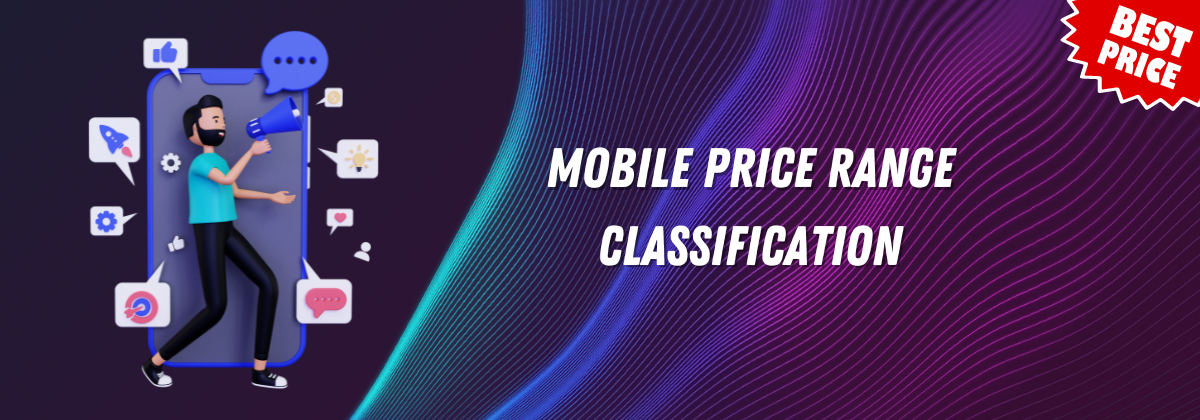

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## ***Load Dataset :***

- _There are two different datasets are given namely "train.csv" and "test.csv". Initially "train.csv" file is loaded to perform Exploratory Data Analysis (EDA) and Machine Learning._

In [61]:
#Importing dependencies
import pandas as pd

In [62]:
#Loading the training  dataset in pandas dataframe
df_train=pd.read_csv('train.csv')
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


#### ***1. Shape of the Dataset :***

In [63]:
#Shape
print("Shape of the dataset :",df_train.shape)

Shape of the dataset : (2000, 21)


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___
- _The dataset consists of  ` 2000 rows `  and  ` 21 columns ` ._

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ***2. Column Description :***

| Column      | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| battery_power  | Total energy a battery can store in mAh.                                                      |
| blue           | Bluetooth enabled (1 if yes, 0 if no).                                                        |
| clock_speed    | Speed at which microprocessor executes instructions.                                           |
| dual_sim       | Dual SIM support (1 if yes, 0 if no).                                                          |
| fc             | Front Camera mega pixels.                                                                     |
| four_g         | 4G network support (1 if yes, 0 if no).                                                        |
| int_memory     | Internal Memory (in gigabytes).                                                               |
| m_dep          | Mobile Depth in cm.                                                                           |
| mobile_wt      | Weight of mobile phone.                                                                       |
| n_cores        | Number of cores of the processor.                                                             |
| pc             | Primary Camera mega pixels.                                                                   |
| px_height      | Pixel Resolution Height.                                                                      |
| px_width       | Pixel Resolution Width.                                                                       |
| ram            | Random Access Memory in megabytes.                                                            |
| sc_h           | Screen Height of mobile in cm.                                                                |
| sc_w           | Screen Width of mobile in cm.                                                                 |
| talk_time      | Longest time that a single battery charge will last when you are talking.                      |
| three_g        | 3G network support (1 if yes, 0 if no).                                                        |
| touch_screen   | Touch screen support (1 if yes, 0 if no).                                                      |
| wifi           | Wifi connectivity (1 if yes, 0 if no).                                                         |
| price_range    | Price range of the mobile phone (0 - low cost, 1 - medium cost, 2 - high cost, 3 - very high cost). |


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

There are 21 columns are available in this datasets with ***"8 categorical columns"** and **"13 numerical columns"***.

- ***Categorical Columns :***
    - blue 
    - dual_sim 
    - four_g 
    - three_g 
    - touch_screen 
    - wifi 
    - n_cores 
    - price_range 
- ***Numerical Columns :***
    - battery_power 
    - clock_speed 
    - fc 
    - int_memory 
    - m_dep 
    - mobile_wt 
    - pc 
    - px_height 
    - px_width 
    - ram 
    - sc_h 
    - sc_w 
    - talk_time 



 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___Checking for Data Quality :___

In [64]:
#Basic information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

___Checking for Duplicates and Null Values :___

In [65]:
#Checking for duplicates
print("1. Duplicated Rows :",df_train.duplicated().sum())
#--------------------------------------------------------------------
#Checking for NaN values
print("2. Null Values :")
pd.DataFrame(df_train.isna().sum()).transpose()

1. Duplicated Rows : 0
2. Null Values :


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 ___Checking for Unique Value Counts of Categorical Columns :___

In [66]:
#Categorical columns
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi','n_cores','price_range']
#--------------------------------------------------------------------------------------------
for column in categorical_columns:
    print(f'Unique Value Counts for "{column}":')
    print(df_train[column].value_counts().to_dict())
    print("-"*50)
 

Unique Value Counts for "blue":
{0: 1010, 1: 990}
--------------------------------------------------
Unique Value Counts for "dual_sim":
{1: 1019, 0: 981}
--------------------------------------------------
Unique Value Counts for "four_g":
{1: 1043, 0: 957}
--------------------------------------------------
Unique Value Counts for "three_g":
{1: 1523, 0: 477}
--------------------------------------------------
Unique Value Counts for "touch_screen":
{1: 1006, 0: 994}
--------------------------------------------------
Unique Value Counts for "wifi":
{1: 1014, 0: 986}
--------------------------------------------------
Unique Value Counts for "n_cores":
{4: 274, 7: 259, 8: 256, 2: 247, 3: 246, 5: 246, 1: 242, 6: 230}
--------------------------------------------------
Unique Value Counts for "price_range":
{1: 500, 2: 500, 3: 500, 0: 500}
--------------------------------------------------


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
####  ___Data Quality Assessment :___

- _The dataset is `"free from duplicates and null values"`._
- _The categorical columns are also `"free from errors and irrelevant entries"`._
- _The column data types are appropriately relevant._

`As of now, the overall data quality is clear and good and does not require any data cleaning `

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# ___Step 1 : Exploratory Data Analysis (EDA)___

In [67]:
#Importing Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

- ___Feature Variables :___ 
   - _`'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'`_
- ___Target Variable :___
   - _`'price_range'`_
   
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___1. Summary Statistics :___

In [68]:
numerical_columns =['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
#-------------------------------------------------------------------------------------------------------------------
print("Summary Statistics :")
df_train[numerical_columns].describe()

Summary Statistics :


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


#### ___2. Distribution of Numerical Variables :___

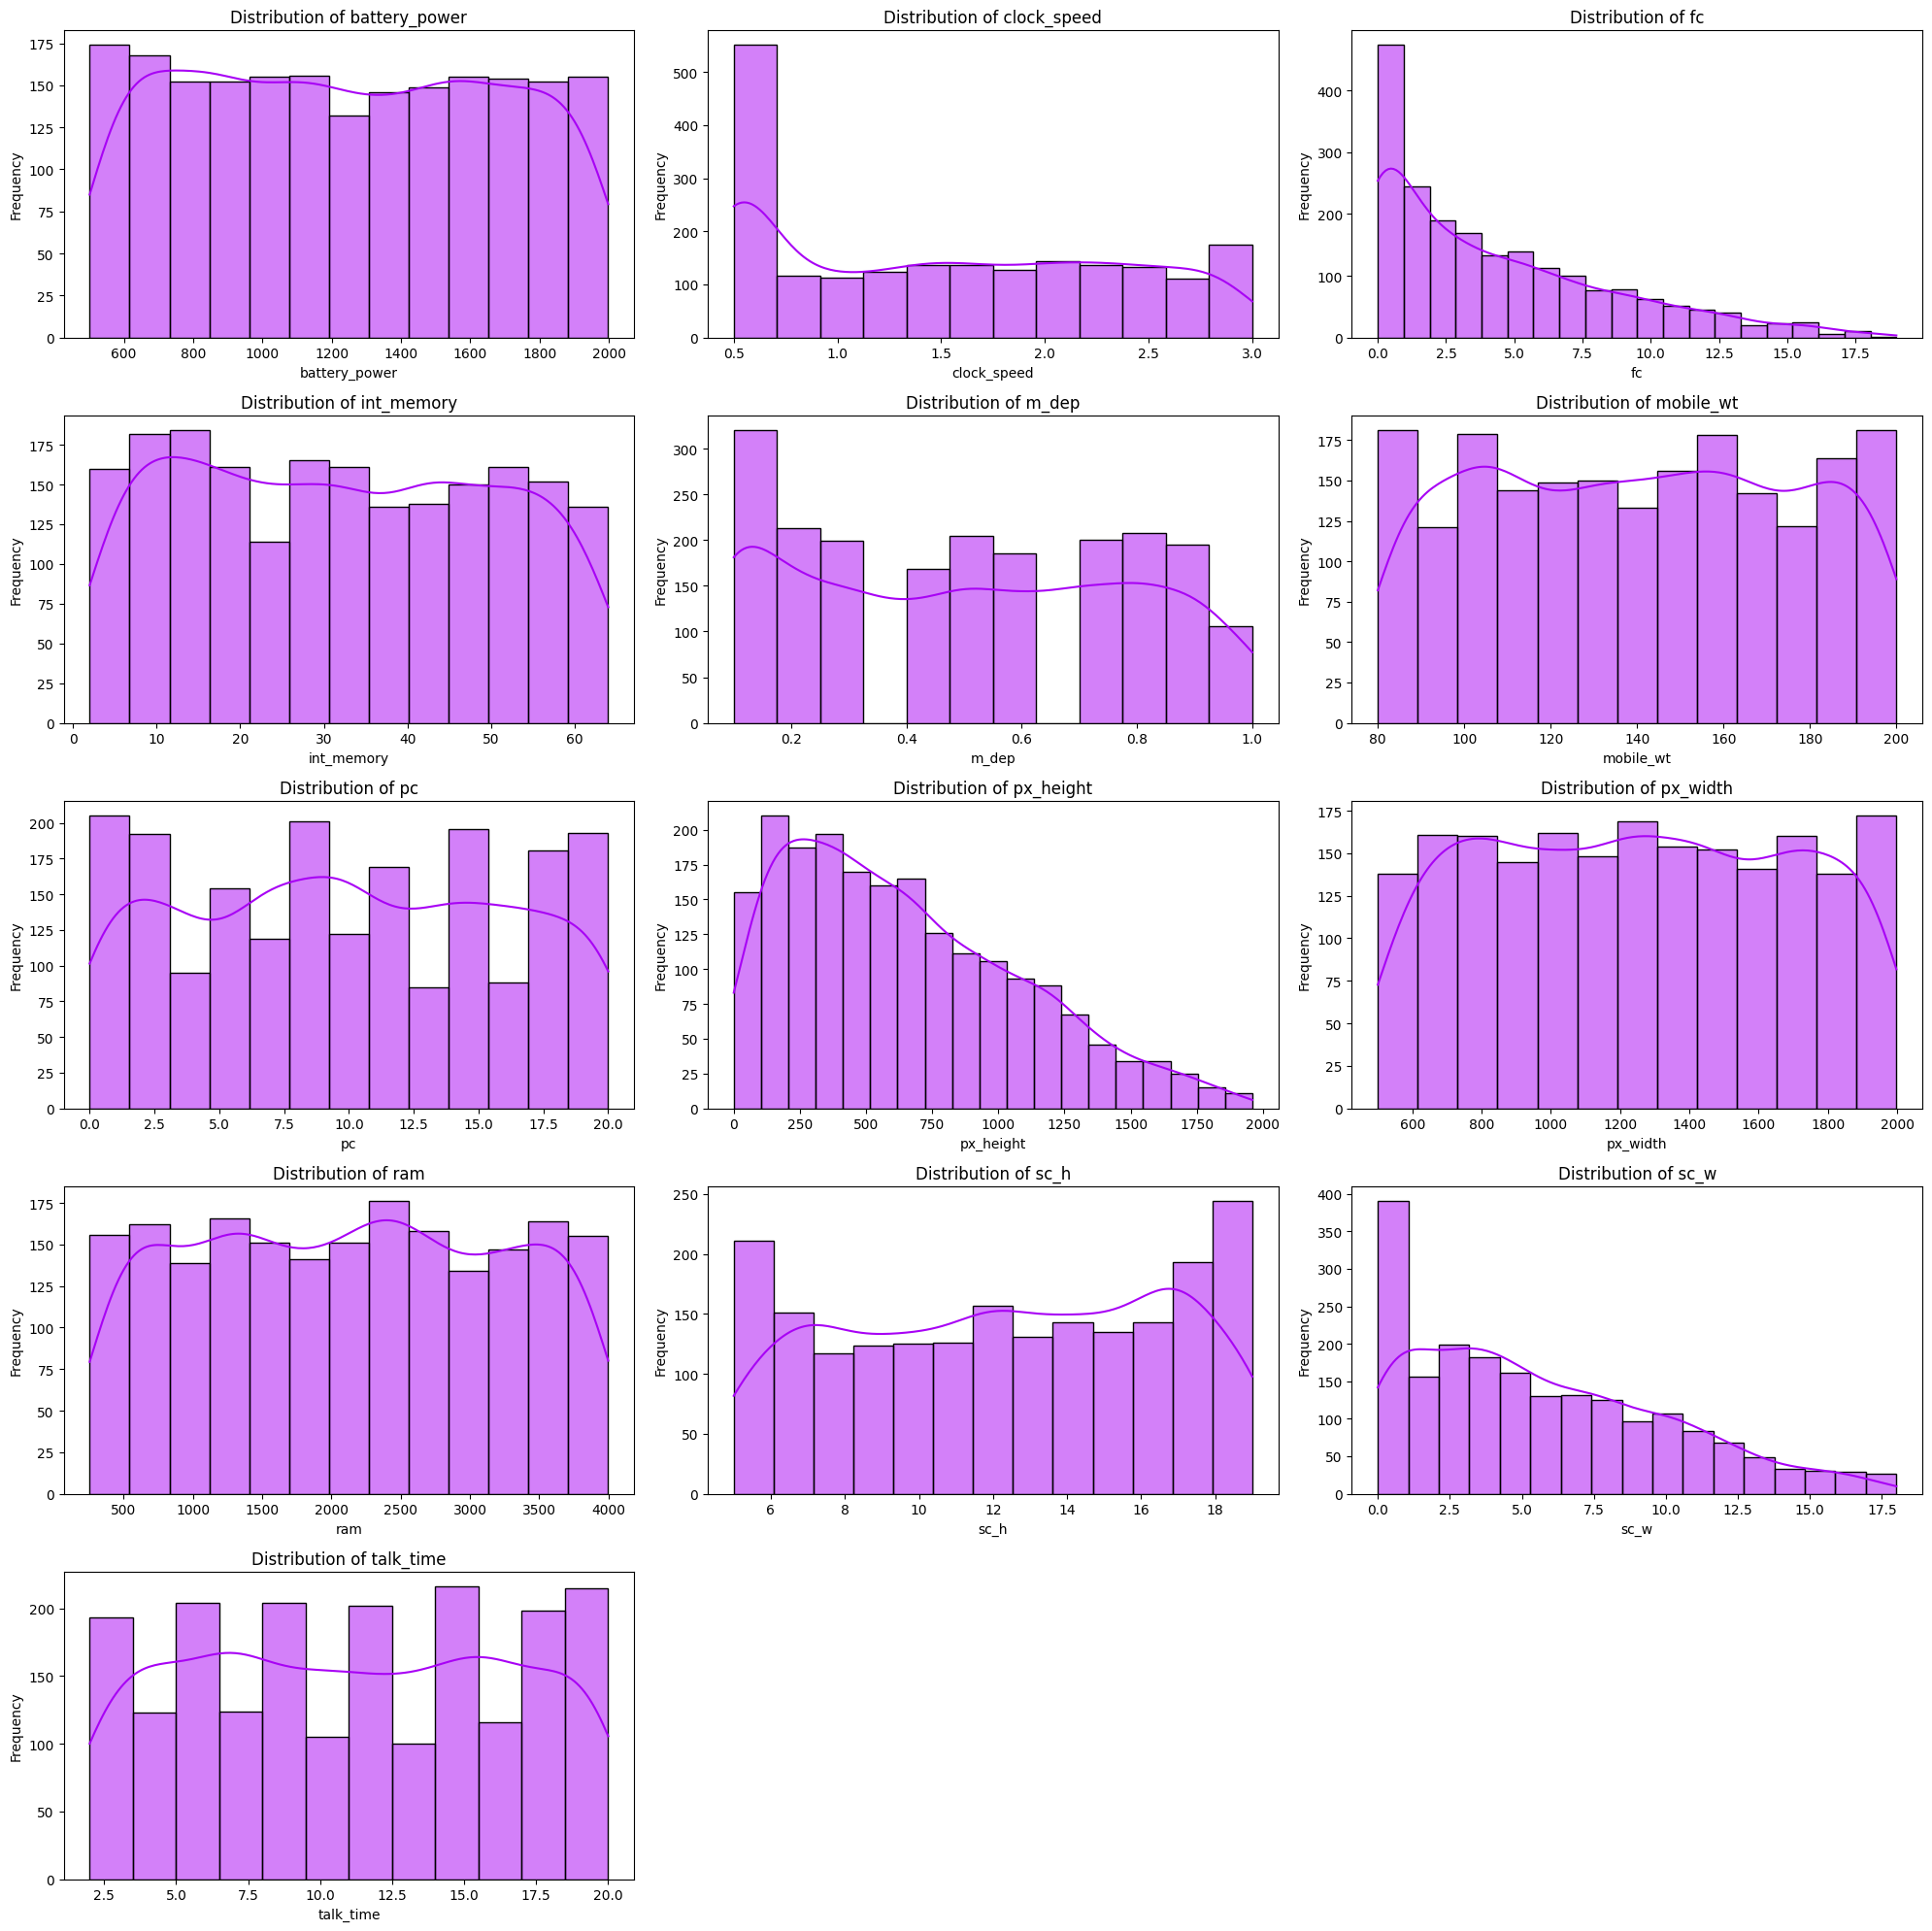

In [69]:
#Histplot
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df_train[col],kde=True,color="#a802f5")
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___
- _***"battery_power", "mobile_wt", "int_memory", "px_width", "ram","talk_time","sc_h","pc"*** are almost `uniformally distributed` in the dataset._
- _***"clock_speed"*** appears to have a uniform distribution, although there are some outliers present._
- _***"m_dep"*** appears to have a uniform distribution, although there are some outliers present._
- _***"fc", "px_height", "sc_w"*** are `highly skewed towards right`._

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___2. Frequency Distribution of Categories in Each Categorical Columns :___

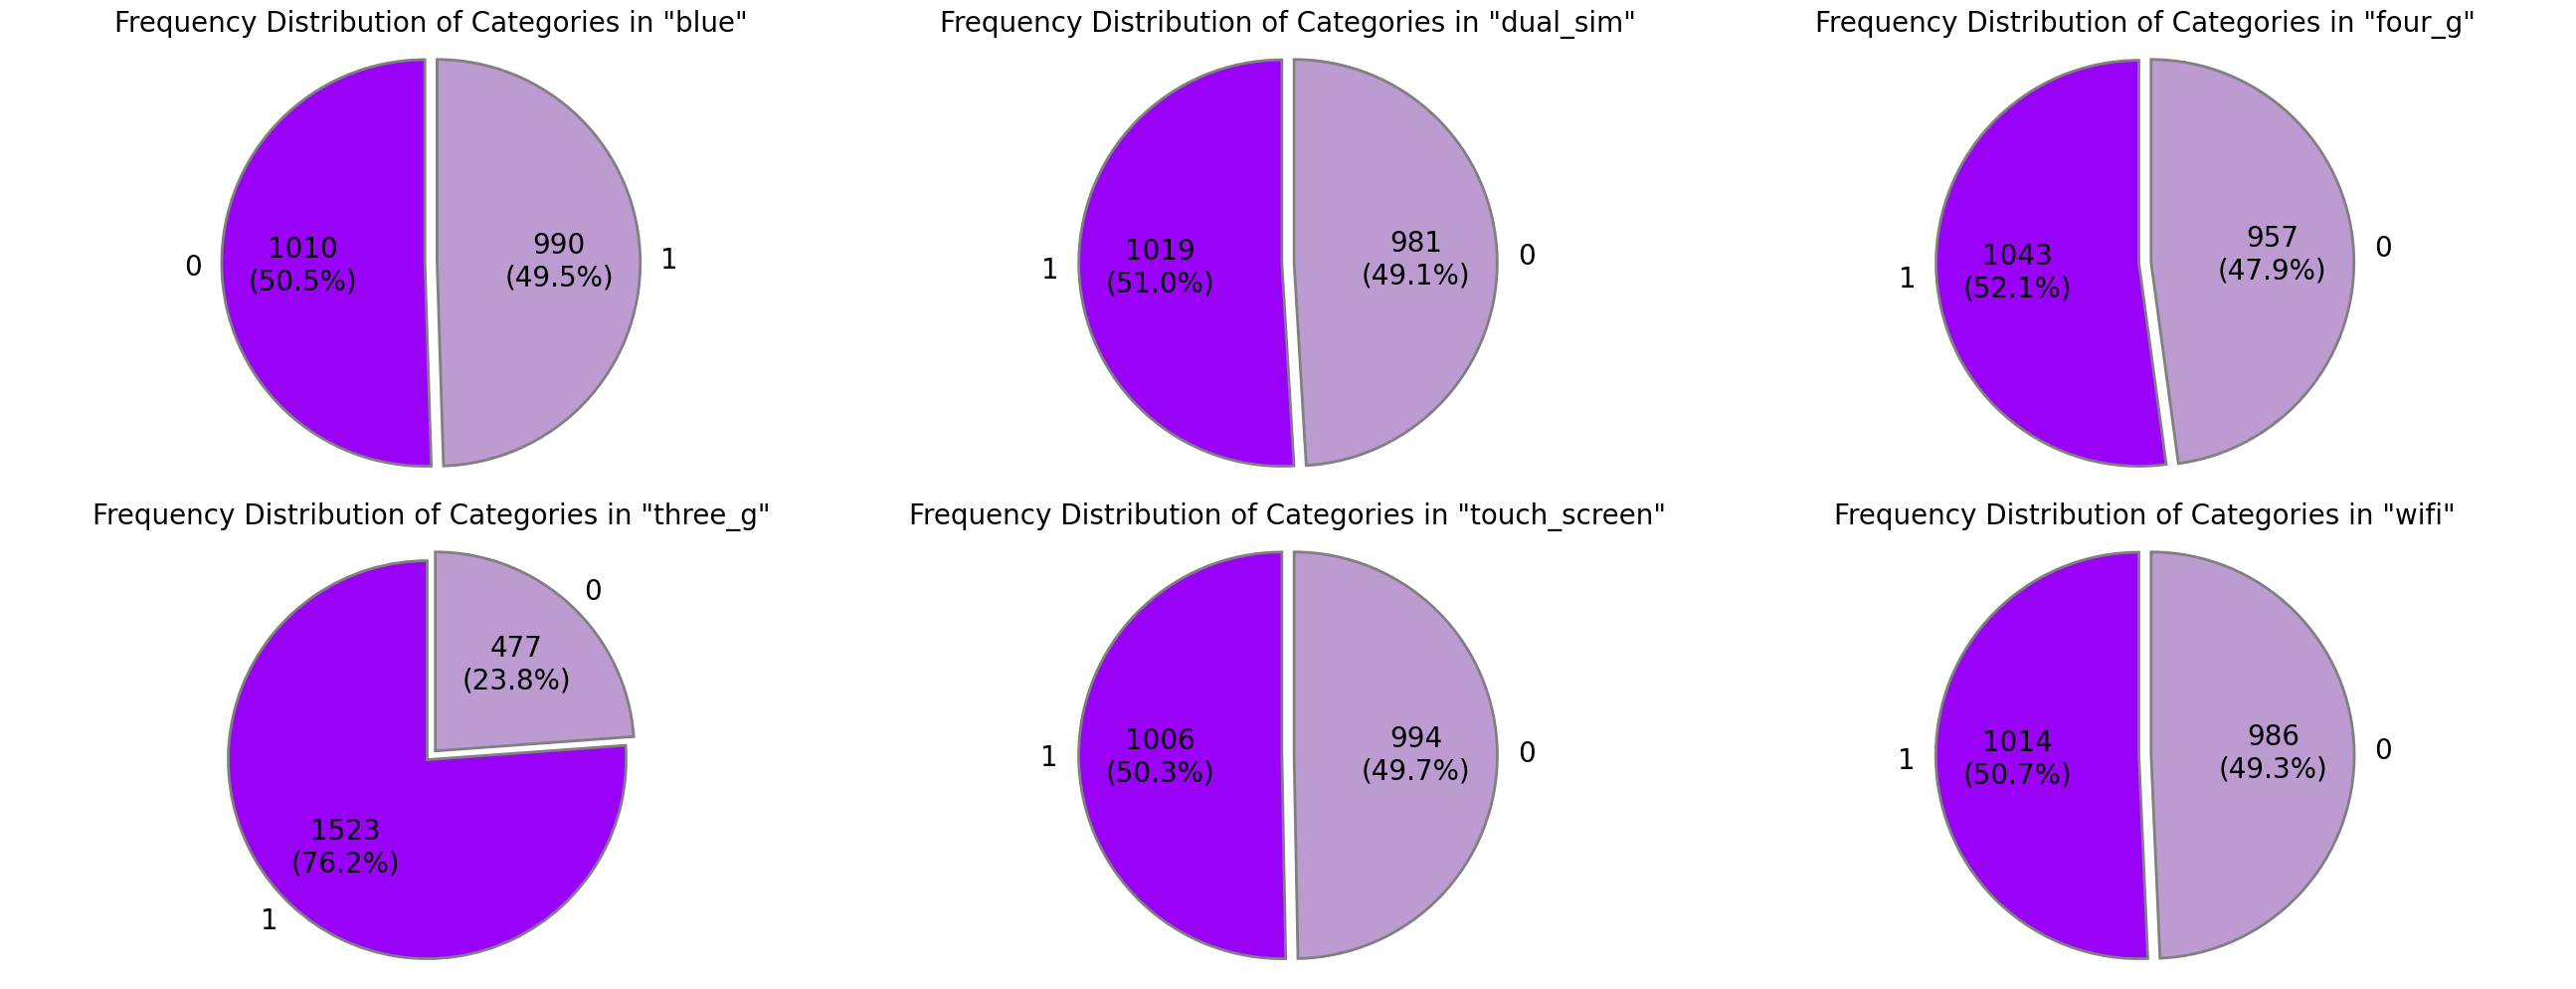

In [70]:
#Pie chart
plt.figure(figsize=(26, 15))
violet_colors = ["#9902f7","#bc9bd1"]
#------------------------------------------------------------------------------------------------
for i, col in enumerate(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']):
    plt.subplot(3, 3, i+1)
    outcome_counts = df_train[col].value_counts()
    labels = outcome_counts.index.tolist()
    counts = outcome_counts.values.tolist()
    explode = [0.03] * len(counts) 
    plt.pie(counts, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(counts) / 100, p), startangle=90, explode=explode, colors=violet_colors,textprops={'fontsize': 20}, wedgeprops={'linewidth': 2, 'edgecolor': 'grey'})
    plt.axis('equal')  
    plt.title(f'Frequency Distribution of Categories in "{col}"',fontsize=20) 
#------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.show()


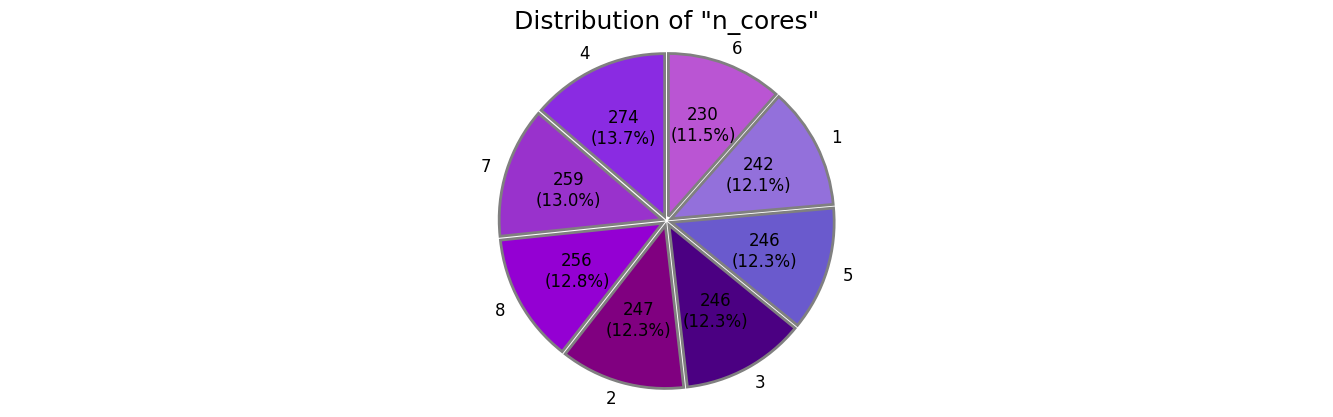

In [71]:
# n_cores 
plt.figure(figsize=(40, 12))
violet_colors = ['#8a2be2', '#9932cc', '#9400d3', '#800080', '#4b0082', '#6a5acd', '#9370db', '#ba55d3', '#8b008b']
#------------------------------------------------------------------------------------------------
for i, col in enumerate(['n_cores']):
    plt.subplot(3, 3, i+1)
    outcome_counts = df_train[col].value_counts()
    labels = outcome_counts.index.tolist()
    counts = outcome_counts.values.tolist()
    explode = [0.03] * len(counts) 
    plt.pie(counts, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(counts) / 100, p), startangle=90, explode=explode, colors=violet_colors,textprops={'fontsize': 12}, wedgeprops={'linewidth': 2, 'edgecolor': 'grey'})
    plt.axis('equal')  
    plt.title(f'Distribution of "{col}"',fontsize=18) 
#------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.show()


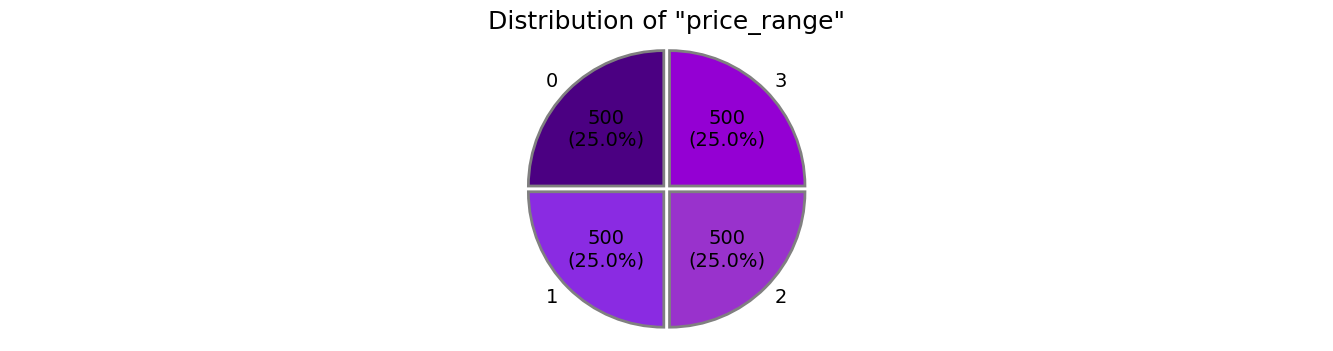

In [72]:
#price_range
plt.figure(figsize=(40, 10))
violet_colors = ['#8a2be2', '#9932cc', '#9400d3',  '#4b0082', '#6a5acd', '#ba55d3', '#8b008b']
#------------------------------------------------------------------------------------------------
for i, col in enumerate(['price_range']):
    plt.subplot(3, 3, i+1)
    outcome_counts = df_train[col].value_counts()
    labels = outcome_counts.index.tolist()
    counts = outcome_counts.values.tolist()
    explode = [0.03] * len(counts) 
    plt.pie(counts, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(counts) / 100, p), startangle=180, explode=explode, colors=violet_colors,textprops={'fontsize': 14}, wedgeprops={'linewidth': 2, 'edgecolor': 'grey'})
    plt.axis('equal')  
    plt.title(f'Distribution of "{col}"',fontsize=18) 
#------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.show()


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _In each categorical column, the ***categories are distributed quite evenly***, with a small variance ranging from ***0.5% to 4%***, except for the "three_g" column._

- _The "three_g" column displays an imbalanced distribution, with ***76.2%*** of the data indicating support for 3G networks, while ***23.8%*** indicate no support for 3G networks._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___3. Relationship Between Numerical  Columns  and the Target Variable :___

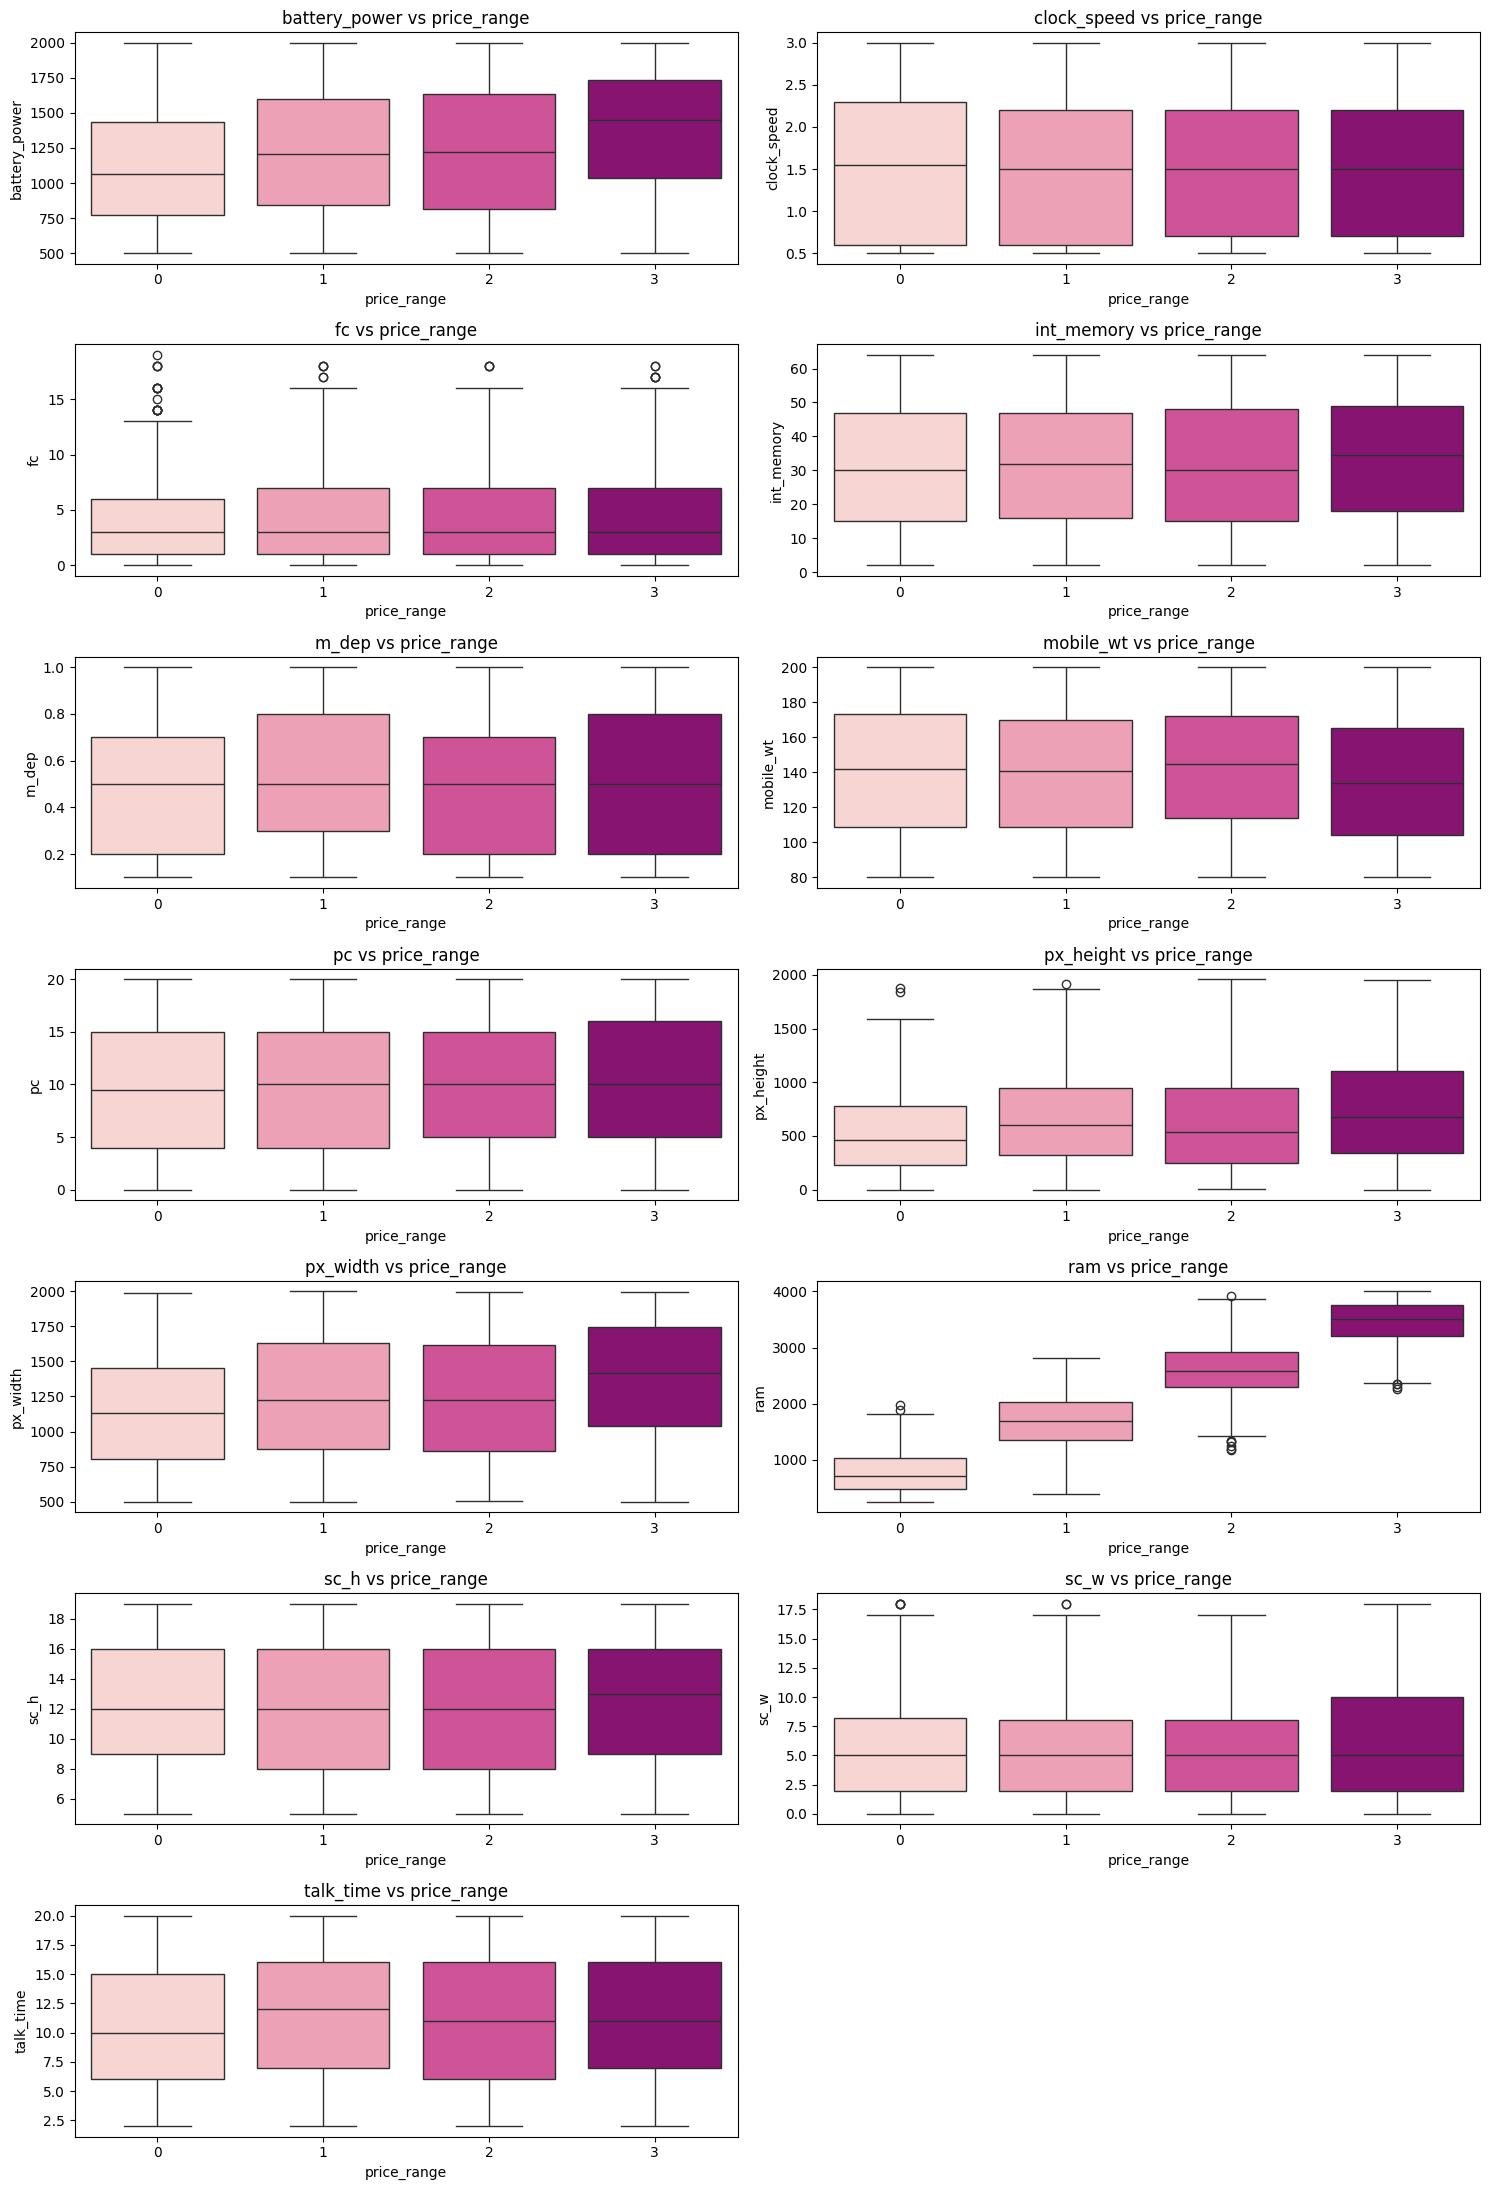

In [73]:
#Boxplot
plt.figure(figsize=(15, 22))
for i, column in enumerate(numerical_columns):
    plt.subplot(7, 2, i+1)
    sns.boxplot(x='price_range', y=column, data=df_train, palette='RdPu')
    plt.title(f"{column} vs price_range")
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _The data shows that across all numerical columns, there's - almost an ***even distribution of values within the four price ranges***, except for the ***"ram"** column. In this column, as the "ram"  increases, there's a noticeable escalation in "price_range".Which clearly indicates there is ***relationship between "price_range" and "ram"***._
- _There's a noticeable ***relationship between "battery_power" and "price_range"*** and also ***"px_width" and "price_range"***._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___4. Checking for Outliers :___

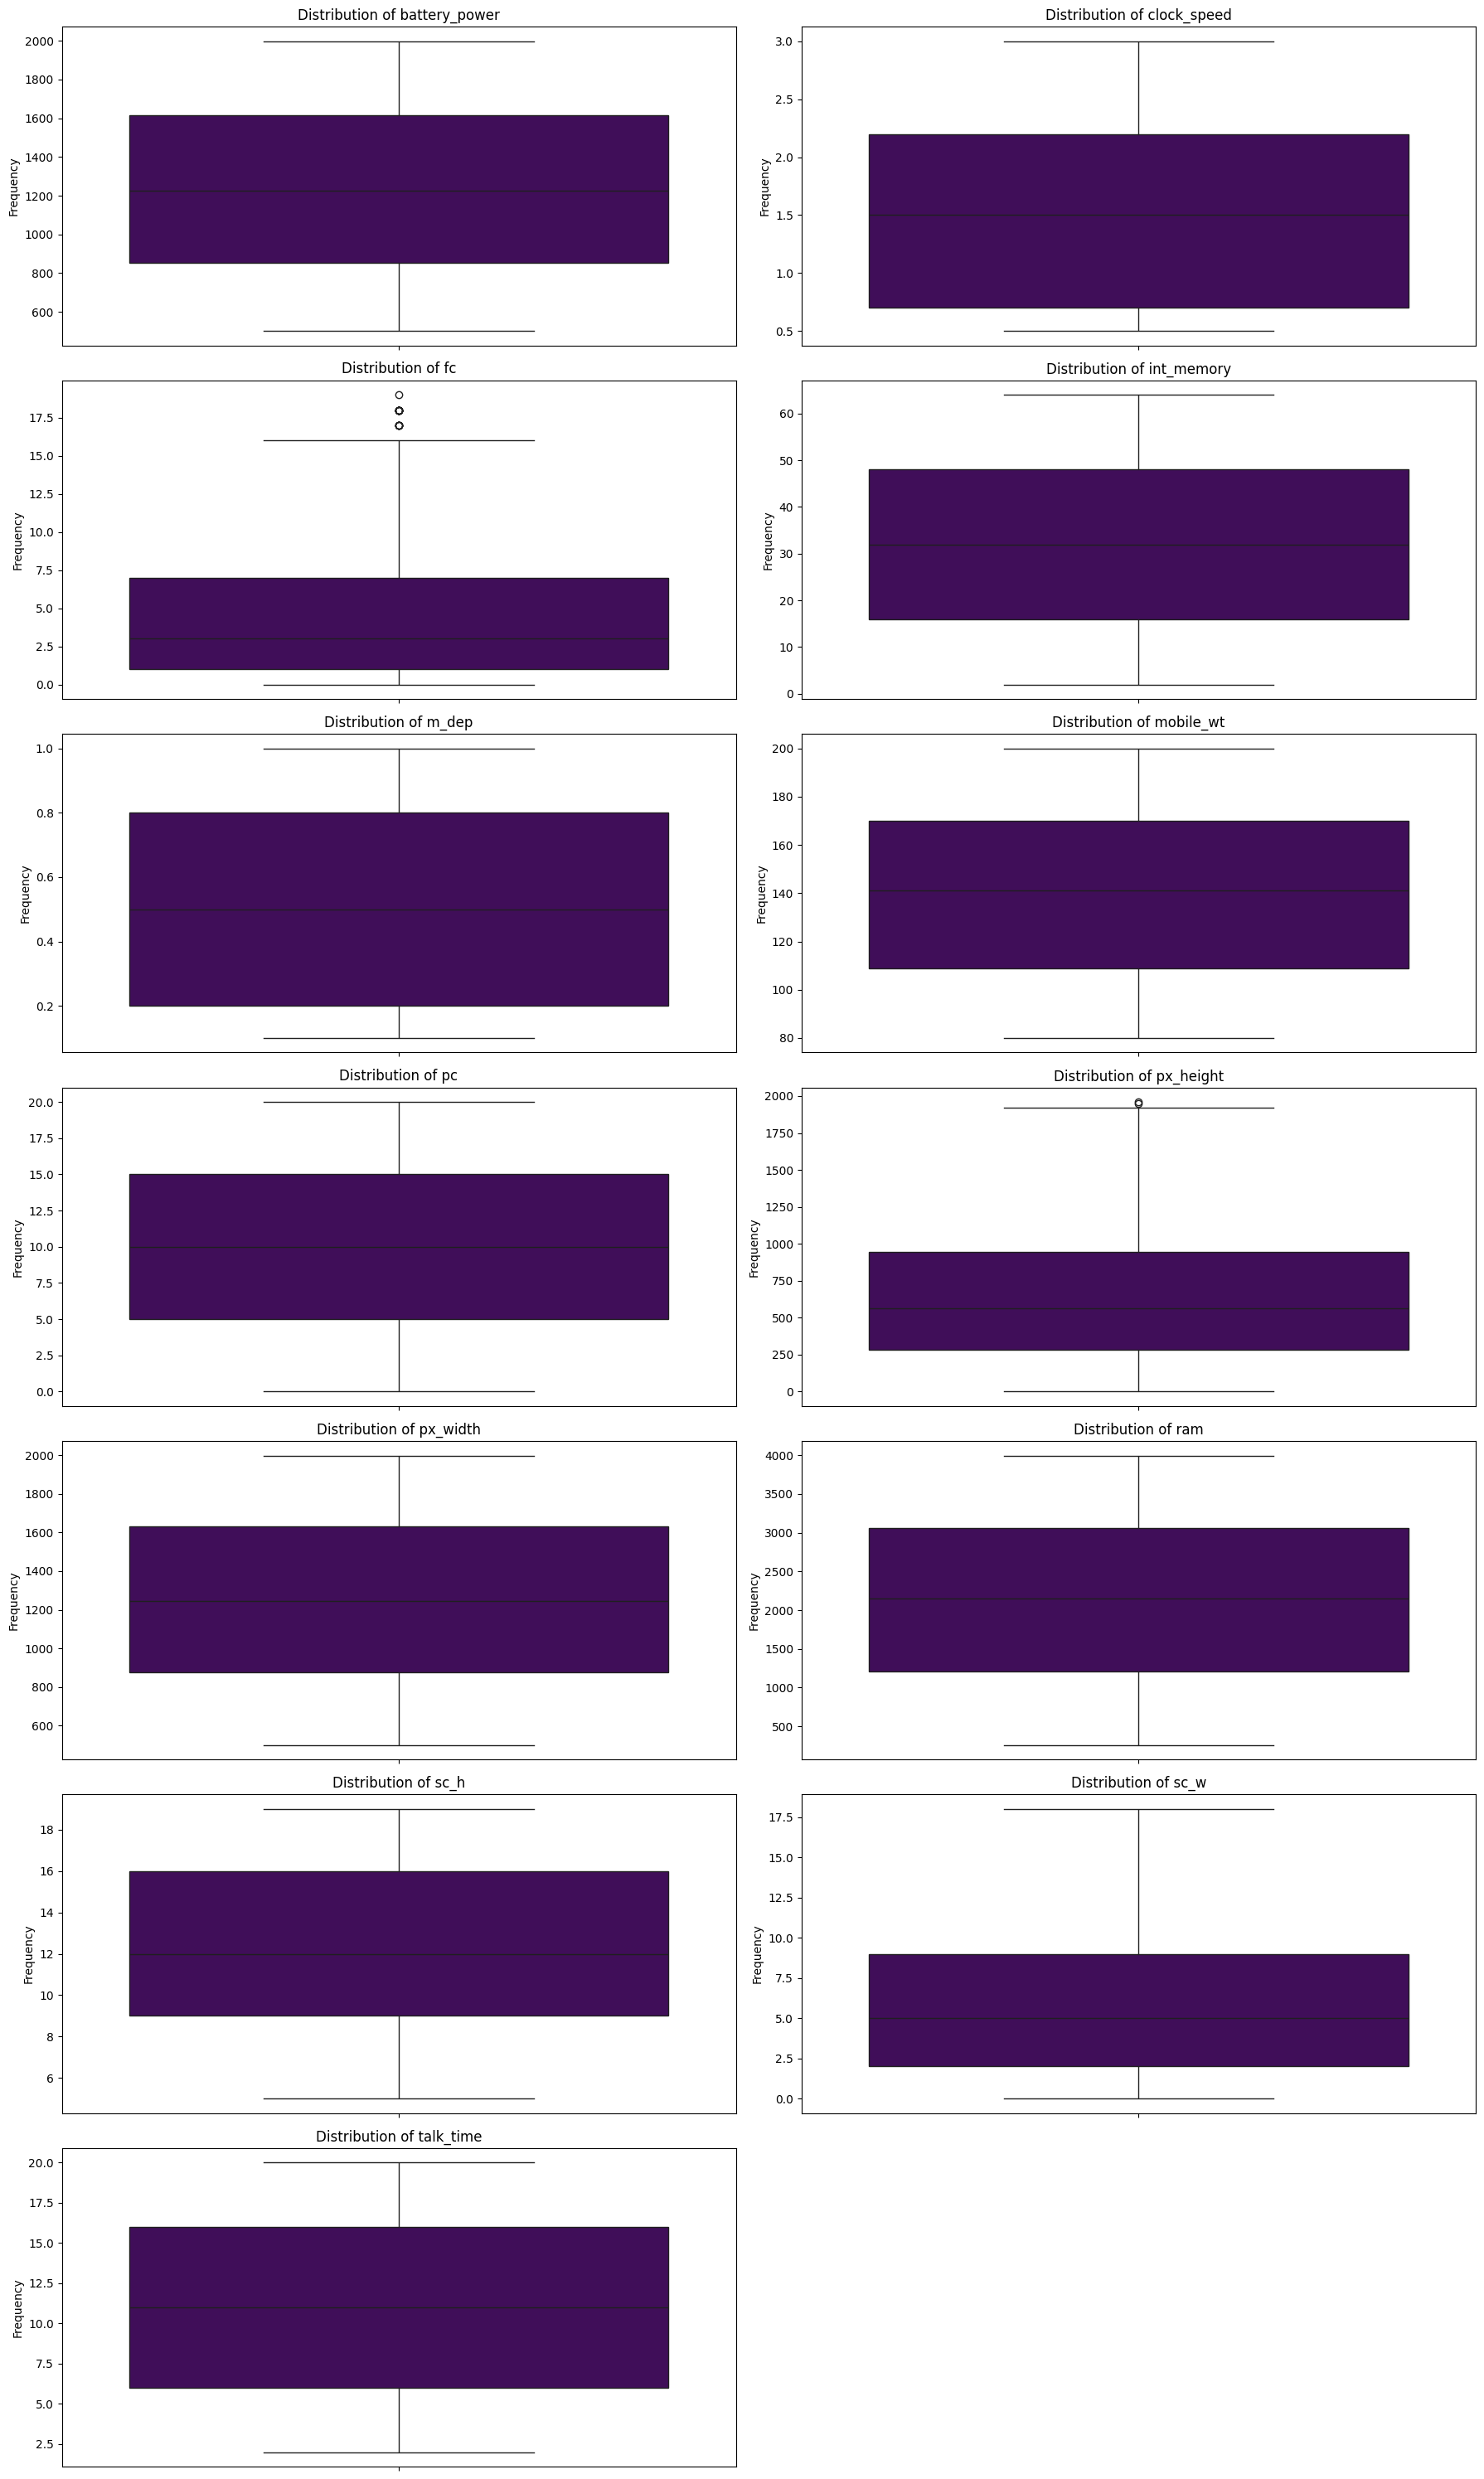

In [74]:
#Boxplot
plt.figure(figsize=(18, 30))
for i, col in enumerate(numerical_columns):
    plt.subplot(7,2, i+1)
    sns.boxplot(df_train[col], color='#440166')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _Outliers are seen in 4 columns_
    - _clock_speed_
    - _fc_
    - _px_height_
    - _sc_w_
      
_`Given the limited presence of outliers, it indicates that the majority of data points fall within a relatively tight range.`_

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___5. Correlation Matrix :___

In [75]:
#Importing necessary libraries
from scipy.stats import pointbiserialr, chi2_contingency

___A. Correlation Between Continuous Variables :___

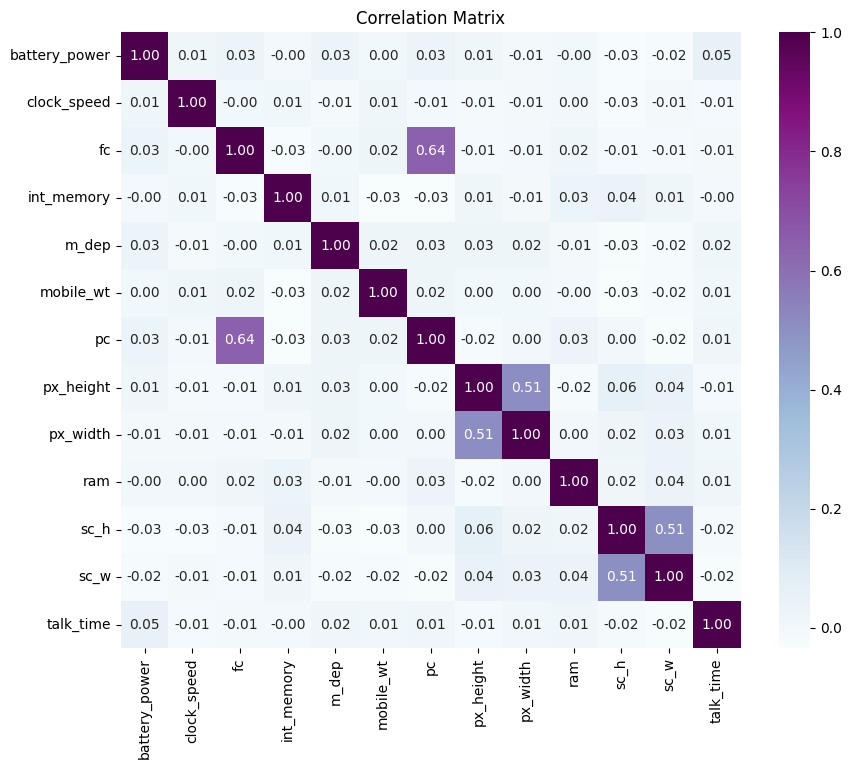

In [76]:
#Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[numerical_columns].corr(), annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _The ***"pc" and "fc"*** columns exhibit a strong ***positive correlation***, with a coefficient of `0.65`, indicating a robust relationship between them._
- _There is a positive correlation of `0.44` between the ***"px_height" and "px_width"** columns, suggesting a moderate relationship between the height and width pixel dimensions._
- _The ***"sc_w" and "sc_h"*** columns demonstrate a moderate positive correlation, with a coefficient of `0.42`._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___B. Correlation Between Continuous Variables and Target :___

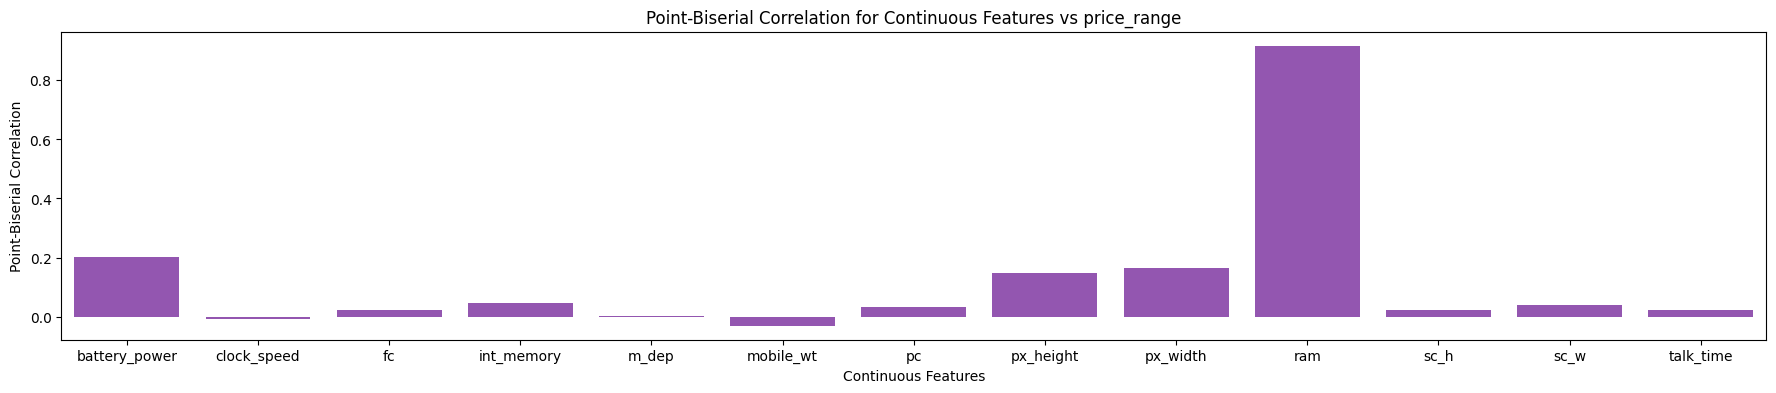

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.200723,-0.006606,0.021998,0.044435,0.000853,-0.030302,0.033599,0.148858,0.165818,0.917046,0.022986,0.038711,0.021859


In [77]:
#Point-Biserial Correlation
pb_corr = {}
for feature in numerical_columns: 
    corr, _ = pointbiserialr(df_train[feature],df_train['price_range'])
    pb_corr[feature] = corr
#--------------------------------------------------------------------------------------------------------------
continuous_feature_target_correlation=pd.DataFrame(pd.Series(pb_corr)).transpose()
#--------------------------------------------------------------------------------------
#Bar graph
plt.figure(figsize=(22, 4))
sns.barplot(data=continuous_feature_target_correlation, color='#9947bf')
plt.xlabel('Continuous Features')
plt.ylabel('Point-Biserial Correlation')
plt.title('Point-Biserial Correlation for Continuous Features vs price_range')
plt.show()
#--------------------------------------------------------------------------------------------------------------
continuous_feature_target_correlation

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _The ***"ram"*** column displays a ***strong relationship*** with the ***"price_range"*** column, followed by ***"battery_power," "px_width," and "px_height"***, all of which also have a significant relationship with the ***"price_range"*** column._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___C. Correlation Between Categorical  Variables and Target :___

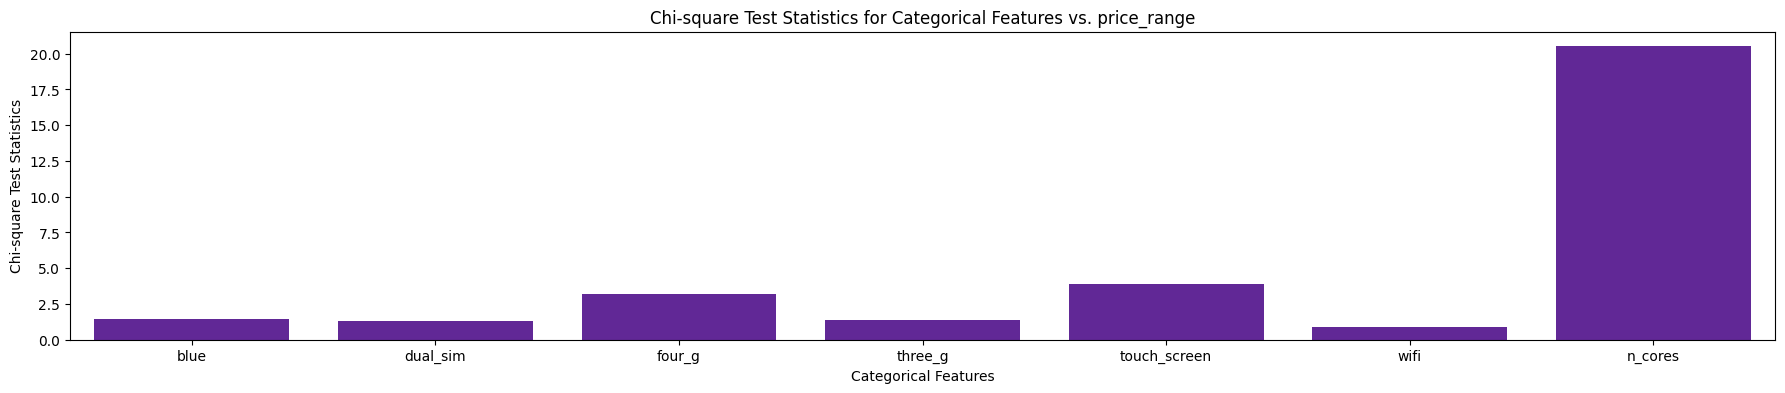

,blue,dual_sim,four_g,three_g,touch_screen,wifi,n_cores
0,1.432143,1.286464,3.17988,1.373764,3.88014,0.856168,20.52445


In [78]:
#Chi-square test
chi2_test = {}
for feature in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi','n_cores']:  
    contingency_table = pd.crosstab(df_train[feature], df_train['price_range'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    chi2_test[feature] = chi2
#--------------------------------------------------------------------------------------------------------------
category_feature_target_correlation=pd.DataFrame(pd.Series(chi2_test)).transpose()
#--------------------------------------------------------------------------------------------------------------
#Bar graph
plt.figure(figsize=(22, 4))
sns.barplot(data=category_feature_target_correlation, color='#6216a8')
plt.xlabel('Categorical Features')
plt.ylabel('Chi-square Test Statistics')
plt.title('Chi-square Test Statistics for Categorical Features vs. price_range')
plt.show()
#--------------------------------------------------------------------------------------------------------------
category_feature_target_correlation

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _The ***"n_cores"*** column shows a ***strong relationship*** with the ***"price_range"*** column, followed by ***"four_g" and "touch_screen"***, both of which also exhibit a notable relationship with the ***"price_range"*** column._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ___Data Preprocessing for Machine learning :___

- _The data is processed as per the need for building a machine learning model._

#### ___1. Removing  Outliers :___
- _Outliers are removed by using ***Interquartile Range (IQR)*** method ._

In [79]:
#Importing dependencies
import numpy as np

In [80]:
outlier_columns = ["clock_speed", "fc", "px_height", "sc_w"]
#------------------------------------------------------------------------------------------
print("Shape of the data before removing outliers:", df_train.shape)
#------------------------------------------------------------------------------------------
for column in outlier_columns:
    q1 = df_train[column].quantile(0.25)
    q3 = df_train[column].quantile(0.75)
    #---------------------------------------
    iqr = q3 - q1
    #---------------------------------------
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    #---------------------------------------
    df_train = df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]
#------------------------------------------------------------------------------------------
print("Shape of the data after removing outliers:", df_train.shape)

Shape of the data before removing outliers: (2000, 21)
Shape of the data after removing outliers: (1980, 21)


#### ___2. Logarthmic Transformation :___
- _Applying log transformation to particular columns inorder to change the data from skewed distribution to normal distribution._

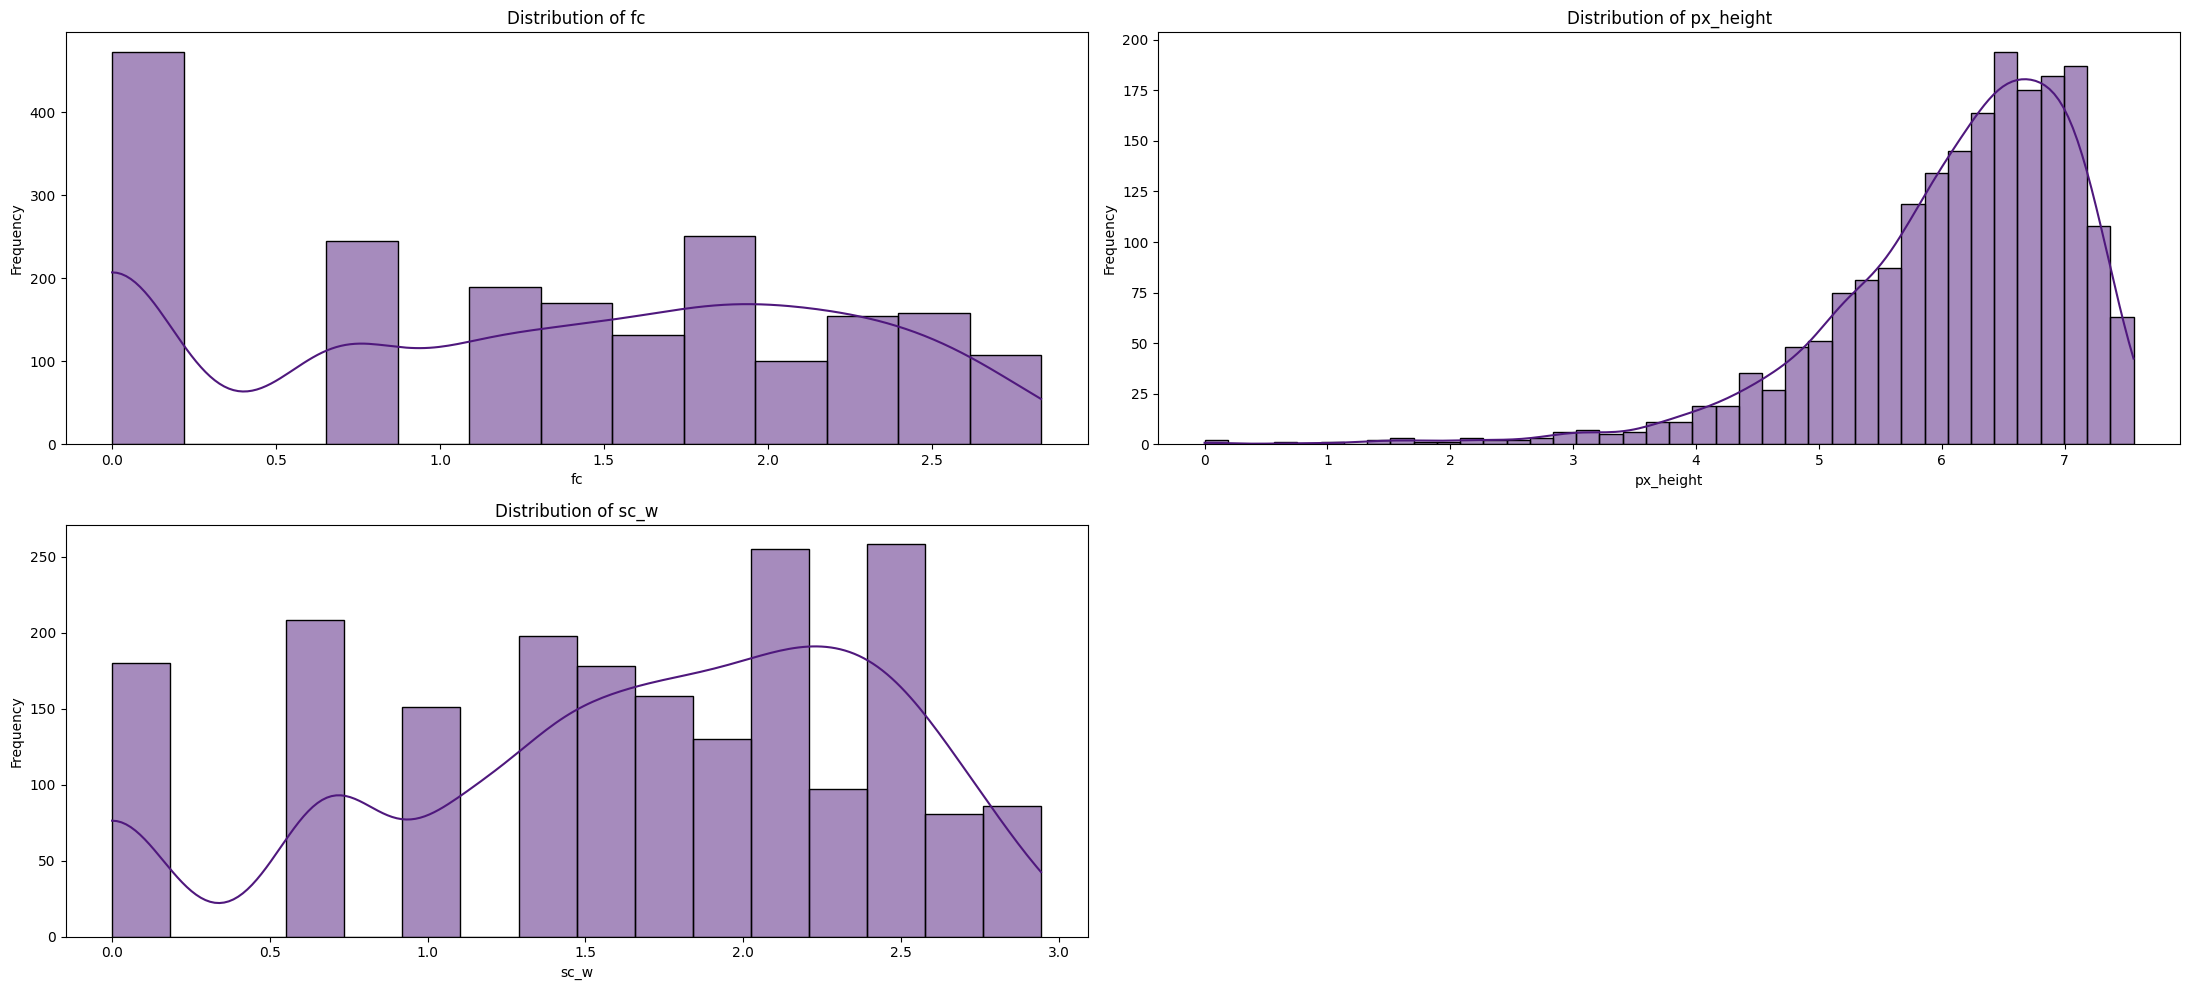

In [81]:
columns_to_transform = ["fc", "px_height", "sc_w"]
#Log transformation
df_train[columns_to_transform] = df_train[columns_to_transform].apply(lambda x: np.log(x+1))
#---------------------------------------------------------------------------------------------------------
#Histplot
plt.figure(figsize=(22, 10))
for i, col in enumerate(columns_to_transform):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_train[col],kde=True,color="#4f187d")
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _After applying log transformation to "px_height" column become completely left skewed. Inorder to overcome this ***Box-Cox transformation*** is done._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___6. Box-Cox Transformation :___

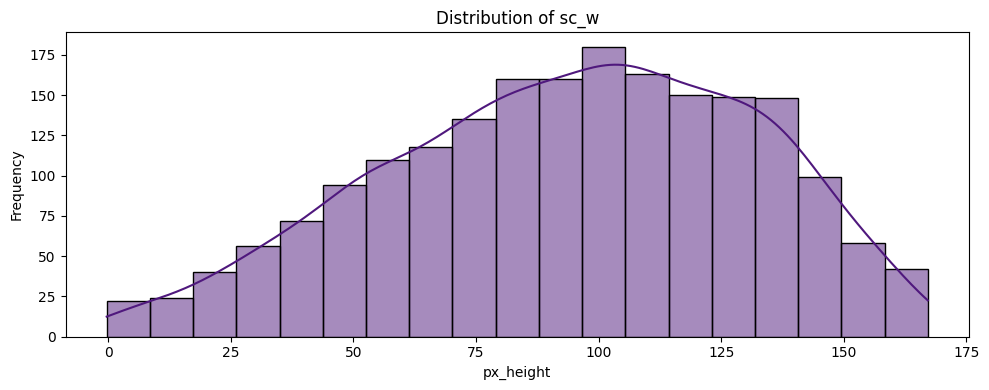

In [82]:
from scipy import stats
# Adding a small constant to avoid zero values
df_train["px_height"] += 0.001
#--------------------------------------------------------------------------
fitted_data, fitted_lambda  = stats.boxcox(df_train["px_height"])
df_train["px_height"] = fitted_data
#--------------------------------------------------------------------------
#Histplot
plt.figure(figsize=(10,4))
sns.histplot(df_train["px_height"],kde=True,color="#4f187d")
plt.title(f'Distribution of {col}')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _Now the"px_height" column is normally distributed._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [83]:
#Summary Statistics 
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,1236.402020,0.494444,1.521162,0.509091,1.278594,0.520707,32.055051,0.502222,140.168182,4.527273,9.836364,93.795856,1249.646465,2125.135859,12.316667,1.652670,11.003535,0.760606,0.501515,0.505051,1.497980
std,439.568762,0.500095,0.817236,0.500044,0.906925,0.499697,18.126820,0.288722,35.385004,2.291263,6.023408,37.134407,431.606730,1084.556984,4.209307,0.790576,5.458048,0.426821,0.500124,0.500101,1.117863
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,-0.323780,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,849.500000,0.000000,0.700000,0.000000,0.693147,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,67.582656,874.000000,1209.750000,9.000000,1.098612,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1224.000000,0.000000,1.500000,1.000000,1.386294,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,96.530271,1247.000000,2146.500000,12.000000,1.791759,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1614.000000,1.000000,2.200000,1.000000,2.079442,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,123.074191,1629.250000,3066.500000,16.000000,2.302585,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,2.833213,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,167.118099,1998.000000,3998.000000,19.000000,2.944439,20.000000,1.000000,1.000000,1.000000,3.000000


# ___Step 2 : Machine Learning___

### ___Selecting Feature Variable and Target variable :___

In [84]:
print(df_train.columns.to_list()[:-1])
selected_features=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


 ___Numerical variables that exhibit high correlation with each other are eliminated.___
- _'fc'_
- _'px_height'_
- _'sc_h'_
_The above column are eliminated_

In [85]:
#Selecting best feature variables
selected_features=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
#------------------------------------------------------------------------------------------------------------------
#Feature Variables (X)
X=df_train[selected_features]
#Target Variable (y)
y=df_train["price_range"]
#------------------------------------------------------------------------------------------------------------------
print("Shape of X :",X.shape)
print("Shape of y :",y.shape)

Shape of X : (1980, 19)
Shape of y : (1980,)


In [86]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,talk_time,three_g,touch_screen,wifi
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,1236.402020,0.494444,1.521162,0.509091,1.278594,0.520707,32.055051,0.502222,140.168182,4.527273,9.836364,93.795856,1249.646465,2125.135859,1.652670,11.003535,0.760606,0.501515,0.505051
std,439.568762,0.500095,0.817236,0.500044,0.906925,0.499697,18.126820,0.288722,35.385004,2.291263,6.023408,37.134407,431.606730,1084.556984,0.790576,5.458048,0.426821,0.500124,0.500101
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,-0.323780,500.000000,256.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,849.500000,0.000000,0.700000,0.000000,0.693147,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,67.582656,874.000000,1209.750000,1.098612,6.000000,1.000000,0.000000,0.000000
50%,1224.000000,0.000000,1.500000,1.000000,1.386294,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,96.530271,1247.000000,2146.500000,1.791759,11.000000,1.000000,1.000000,1.000000
75%,1614.000000,1.000000,2.200000,1.000000,2.079442,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,123.074191,1629.250000,3066.500000,2.302585,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,2.833213,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,167.118099,1998.000000,3998.000000,2.944439,20.000000,1.000000,1.000000,1.000000


### ___Building Model :___

In [87]:
#Importing dependencies
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

_Train Test Split :_

In [88]:
# Split the datasets for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=7) 

_Scaling the Data :_

In [89]:
#Scaling the data using Standard Scaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

_Principal Component Analysis (PCA) :_

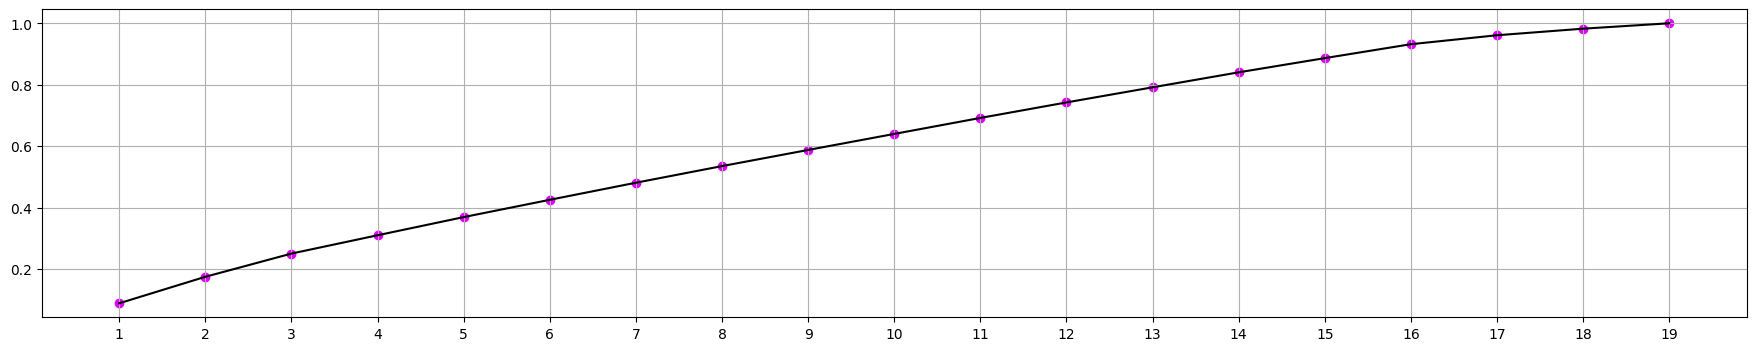

In [90]:
#PCA
#Initially ,assign the number of components to "None"
pca= PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca= pca.transform(X_test_scaled)
#-----------------------------------------------------------------------
#Variance ratio 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
#-----------------------------------------------------------------------
#Visualize the Feature size importance
plt.figure(figsize=(22,4))
plt.scatter(range(1,20),cumulative_explained_variance,color="#df00fc")
plt.plot(range(1,20),cumulative_explained_variance,color="black")
plt.xticks(range(1,20))
plt.grid()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _By observing the graph, it becomes clear that all the features play a significant role in predicting the price range._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

_Model Selection :_



_Different classification models,such as_

_1. `Logistic Regression`_

_2. `Decision Tree Classifier`_

_3. `Random Forest Classifier`_

_4. `CatBoost Classifier`_

_5. `XGBoost Classifier`_

_6. `Support Vector Classifier`_

_7. `K Nearest Neighbors Class`_

_are trained and checked for performance._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

_Model Training :_

In [ ]:
models = {
            #"Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100),
            "Logistic Regression": LogisticRegression(multi_class='auto'),
            "Decision Tree": DecisionTreeClassifier(random_state=7),
            "Random Forest": RandomForestClassifier(random_state=7),
            "CatBoost": CatBoostClassifier(random_state=7),
            "XGBoost": XGBClassifier(),
            "SVC": SVC(),
            "KNN": KNeighborsClassifier(n_neighbors=5)
         }
#------------------------------------------------------------------------------------------
metrics = []
#------------------------------------------------------------------------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    metrics.append({'Model': name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'F1 Score': f1})
#------------------------------------------------------------------------------------------
metrics_df = pd.DataFrame(metrics)

In [92]:
metrics_df

,Model,Train Accuracy,Test Accuracy,F1 Score
0,Logistic Regression,0.968434,0.969697,0.969735
1,Decision Tree,1.000000,0.830808,0.832253
2,Random Forest,1.000000,0.881313,0.883301
3,CatBoost,1.000000,0.936869,0.937622
4,XGBoost,1.000000,0.914141,0.915148
5,SVC,0.981692,0.871212,0.872325
6,KNN,0.711490,0.500000,0.501376


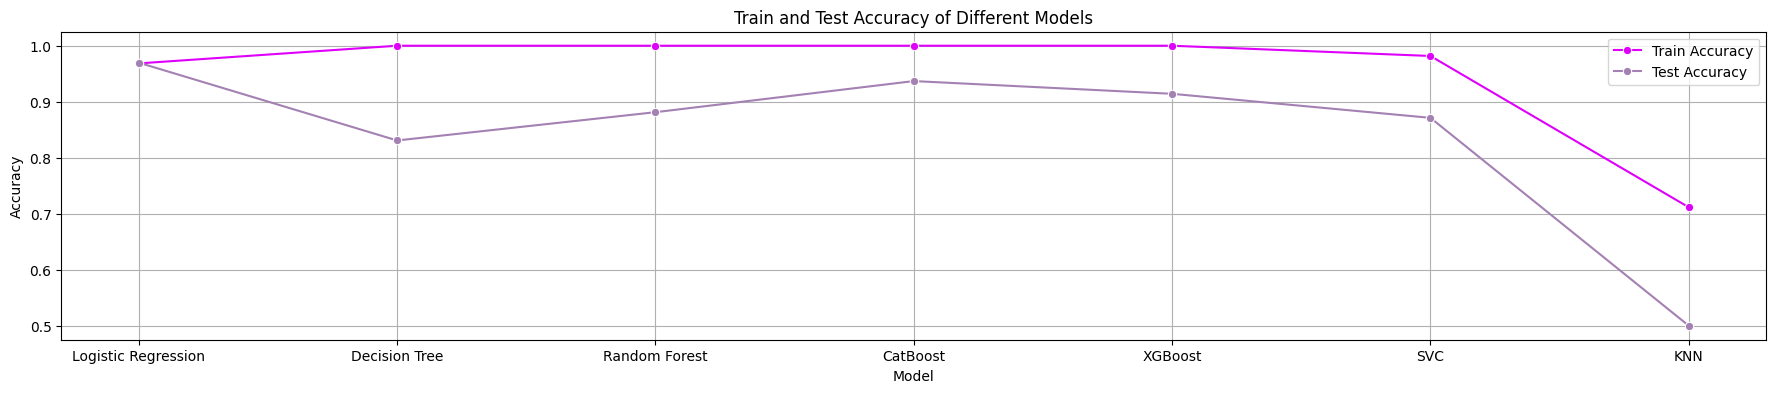

In [107]:
# Line Graph 
plt.figure(figsize=(22 ,4))
sns.lineplot(data=metrics_df, x="Model", y='Train Accuracy', marker='o', color='#df00fc', label='Train Accuracy')
sns.lineplot(data=metrics_df, x="Model", y='Test Accuracy', marker='o', color='#a481b3', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

- _By comparing with all the ***Logistic Regression*** model performs quite well.It's training accuarcy is `96.84%` and testing accuracy is `96.96%` with good F1-score of `96.97%`._
- _Next to the Logistic Regression , the CatBoost model also performs well._
- _Decision Tree, Random Forest ,SVC models are overfitted._
- _The KNN model exhibits notably poor performance, with a train accuracy of `71.14%` and a test accuracy of only `50.00%`._

_`According to the overall performance "Logistic Regression" Model is choosen as best fit model.`_

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ***Hyperparameter Tuning for Logistic Regression Model :***
- _Using  ***"GridSearchCV"*** for Hyperparameter Tuning_

Best hyperparameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Model accuracy: 0.9595959595959596
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        99
           1       0.93      0.93      0.93        99
           2       0.93      0.97      0.95        99
           3       1.00      0.98      0.99        99

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396



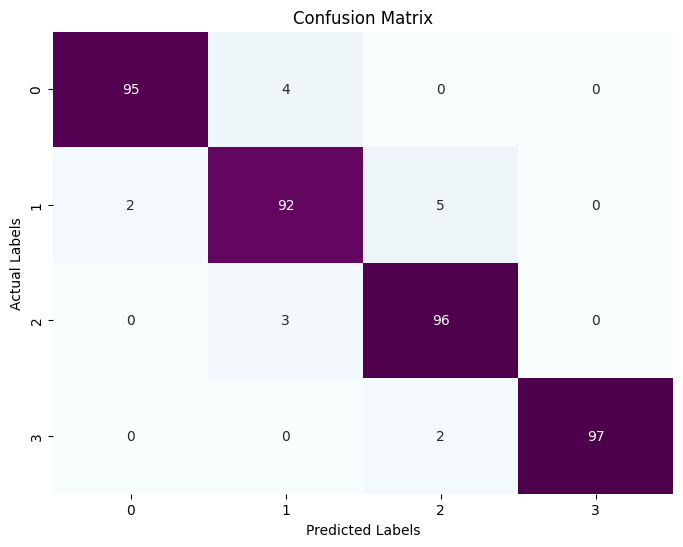

In [94]:
param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  
            'penalty': ['l1', 'l2'],               
            'solver': ['liblinear', 'saga'],      
            'max_iter': [100, 200, 300],          
             }

#----------------------------------------------------------------------------------------------------
#Model
logr_model = LogisticRegression(multi_class='auto')
#----------------------------------------------------------------------------------------------------
#GridSearchCV
grid_search = GridSearchCV(estimator=logr_model , param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
#----------------------------------------------------------------------------------------------------
#Best parameters
best_parameters=grid_search.best_params_
print("Best hyperparameters:",best_parameters)
#----------------------------------------------------------------------------------------------------
#Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
#----------------------------------------------------------------------------------------------------
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:",accuracy)
#----------------------------------------------------------------------------------------------------
#Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
#----------------------------------------------------------------------------------------------------
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observations :___

_1. The Best HyperParameters of Logistic Regression are :_
- _`C=10`_
- _`max_iter=100`_
- _`penalty="l1"`_
- _`solver="saga"`_

_2. Accuracy=`95.95%`_
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Actual Output vs Predicted Output :___

In [95]:
result_df= pd.DataFrame({'Actual Outcome': y_test, 'Predicted Outcome': y_pred})
result_df.sample(n=7)

,Actual Outcome,Predicted Outcome
656,2,2
1936,3,3
113,2,2
913,1,1
891,3,3
349,2,2
663,2,2


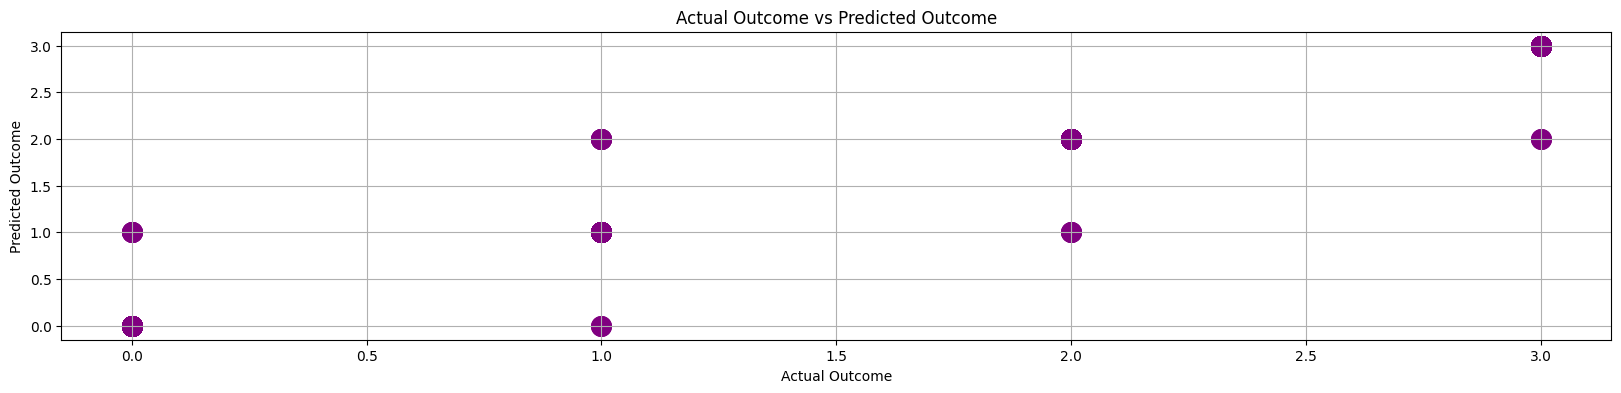

In [96]:
#Plotting Graph
plt.figure(figsize=(20, 4))
plt.scatter(result_df['Actual Outcome'], result_df['Predicted Outcome'], color='purple',s=200)
plt.title('Actual Outcome vs Predicted Outcome')
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.grid(True)
plt.show()

___Saving the  Trained  Model :___

In [97]:
#Import Dependencies
import pickle

In [98]:
#Standard Scaler Model
with open('sc_model.pkl', 'wb') as file:
    pickle.dump(sc, file)
print("Model saved successfully as", 'sc_model.pkl')
#-----------------------------------------------------------
#Logistic Regression Model
with open('logr_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("Model saved successfully as", 'logr_model.pkl')

Model saved successfully as sc_model.pkl
Model saved successfully as logr_model.pkl


## ___Step 3 : Testing the Model with New Data___

#### ___Loading the Test Dataset :___


In [99]:
test_data=pd.read_csv("test.csv")
print("Shape of Test Data :",test_data.shape)
test_data.head(3)

Shape of Test Data : (1000, 21)


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1


In [100]:
#Checking for duplicates
print("1. Duplicated Rows :",test_data.duplicated().sum())
#--------------------------------------------------------------------
#Checking for NaN values
print("2. Null Values :")
pd.DataFrame(test_data.isna().sum()).transpose()


1. Duplicated Rows : 0
2. Null Values :


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


___Prediction :___

In [102]:
#Selecting necessary feature variables 
selected_features=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

df_test=test_data[selected_features]
#Applying Log transformation to the required column
columns_to_transform = ["fc", "px_height", "sc_w"]
df_test[columns_to_transform] = df_test[columns_to_transform].apply(lambda x: np.log(x+1))
#--------------------------------------------------------------------------
#Box-cox for "px_height" column
df_test["px_height"] += 0.001
fitted_data, fitted_lambda  = stats.boxcox(df_test["px_height"])
df_test["px_height"] = fitted_data
#---------------------------------------------------------------------------
#Scaling the data
test_data_scaled=sc.transform(df_test)
#---------------------------------------------------------------------------
#Model Prediction
predicted_price_range=best_model.predict(test_data_scaled)
#---------------------------------------------------------------------------
predicted_price_range[:5]


array([3, 3, 2, 3, 1], dtype=int64)

In [103]:
#Merging the predicted output to the relavant features
price_range=pd.Series(predicted_price_range,name="price_range")
df_test_output=pd.concat([test_data,price_range],axis=1)
df_test_output["price_range_2"]=df_test_output["price_range"].replace( {0: 'low cost',1: 'medium cost',2: 'high cost',3: 'very high cost'})
df_test_output.sample(n=5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_2
144,145,597,1,3.0,1,0,0,16,0.5,140,2,0,35,708,3788,12,0,5,0,0,1,2,high cost
741,742,1888,1,2.7,0,1,1,53,0.1,146,4,3,81,630,1604,10,6,6,1,1,1,1,medium cost
255,256,930,0,1.0,1,5,1,40,0.8,128,7,15,775,1224,3816,13,0,2,1,1,1,3,very high cost
803,804,1636,1,1.8,0,9,0,52,0.9,188,5,11,555,635,2363,13,0,9,0,0,1,2,high cost
648,649,519,1,2.9,0,2,0,3,0.6,83,3,5,491,1527,1231,8,6,16,1,1,1,0,low cost


 ___Saving the Output File :___

In [ ]:
#Saving the ouput file in ".csv" format
df_test_output.to_csv("mobile_price_range_predicted_output.csv",index=False)
print("File Saved Sucessfully.")